## **Mapeamento de Glebas Usando Séries Temporais e Long Short-Term Memory em Grandes Dados de Observação da Terra**

## **Disciplina:** CAP-421-3 Aprendizado Profundo

Gabriel Sansigolo

### Abstract

Mapas de uso e cobertura da Terra são importantes produtos para avaliação
da intervenção humana e da dinâmica ambiental. Para o trabalho busca resolver
o problema de automatização de mapeamento de regiões (Glebas) usando técnicas
de aprendizado profundo supervisionado. Para isso será usado o uma Rede Neural
Recorrente (RNNs), especificamente a rede Long Short-Term Memory (LSTM). 

Além disso, busca-se explorar como uso de séries temporais para mapeamento baseado 
em coleções de imagens de observação da Terra (EO) do catálogo do Brazil Data Cube 
(BDC). Embora existam muitas implementações para classificação de séries temporais 
usando rede LSTM, essas implementações exigem a instalação de diversas bibliotecas 
cada qual para uma função, como extração de séries temporais, download de imagens de 
satélite, treinamento do modelo etc. 

A principal contribuição deste trabalho é um biblioteca em Python para mapeamento 
de glebas usando LSTM em dados observação da Terra do BDC. Ela permitirá que os
analistas gerem de forma simples mapas de uso e cobertura da Terra para regiões
das glebas, facilitando acesso a grandes conjuntos de dados de EO. 

<!-- README.md is generated from README.Rmd. Please edit that file -->

<img src='https://github.com/GSansigolo/rennpa/blob/main/man/figures/logo.png?raw=true' align="right" height="160" />

# rennpa

<!-- badges: start -->

[![Software License](https://img.shields.io/badge/License-GPLv3-blue.svg)](https://github.com/GSansigolo/rennpa/blob/master/LICENSE) [![Documentation Status](https://readthedocs.org/projects/rennpa/badge/?version=latest)](https://rennpa.readthedocs.io/en/latest/) [![Software Life Cycle](https://img.shields.io/badge/lifecycle-stable-green.svg)](https://www.tidyverse.org/lifecycle/#stable) [![Release](https://img.shields.io/github/tag/GSansigolo/rennpa.svg)](https://github.com/GSansigolo/rennpa/releases) [![Python Package Index](https://img.shields.io/pypi/v/rennpa)](https://pypi.org/project/rennpa/) 

<!-- badges: end -->

### Overview

**rennpa**: **RE**current **N**eural **N**etwork **P**ython **A**PI, is an Python package with a RNN ready for satellite image time series classification. The package implements a number of functions to assist the proccess of production of land use and land cover maps based on time series, all based on the Brazil Data Cube image catalog.

### Usage

**rennpa** package process to generate a LULC map can be explained using the four functions: (1) rennpa_get_timeseries; (2) rennpa_lstm; (3) rennpa_train and (4) rennpa_classify. Although these are the four main functions of the package, there are over 27 functions for each of the stages before, during and after the process of producing LULC map. 

<img src='https://github.com/GSansigolo/rennpa/blob/main/man/figures/usage.png?raw=true' align="center" height="500" />


### **Instalando o rennpa**

In [1]:
#!pip3 install git+https://github.com/GSansigolo/rennpa

### **Importando bibliotecas**

In [2]:
from rennpa import *

### **Importando amostras**

In [3]:
raw_csv = "input.csv"

### **Embaralha os dados**

In [4]:
#shuffle_data(input=raw_csv, output="input.csv")

### **Cria do objeto cubo de dados**

In [5]:
cube = dict(
    collection="S2-16D-2",
    start_date="2023-01-01",
    end_date="2023-12-31",
    freq='16D',
    bands=["B02", "B03", "B04", "B08", "NDVI", "EVI", "NBR"]
)

### **Extrai séries temporais**

In [6]:
#ts = rennpa_get_timeseries(cube, input="input.csv",output="timeseries.json")

In [7]:
ts = rennpa_open_ts_json(input="timeseries.json")

### **Cria novos indicies usando as séries temporais**

In [8]:
indicies = dict(
    OSAVI = rennpa_create_indicies(formula="OSAVI", bands=dict(NIR="B08", RED="B04"), timeseries=ts),
    NDWI =  rennpa_create_indicies(formula="NDWI", bands=dict(NIR="B08", GREEN="B03"), timeseries=ts),
    RECI = rennpa_create_indicies(formula="RECI", bands=dict(NIR="B08", RED="B04"), timeseries=ts)
)

### **Cria dataframe unindo séries temporais, amostras e índices**

In [9]:
df = rennpa_dataframe(timeseries=ts, input_csv="input.csv", indicies=indicies)

In [10]:
labels = {319: 0, 320: 1, 321: 2, 323: 3, 324: 4, 325: 5, 326: 6, 327: 7, 328: 8}

In [11]:
df['label'] = [labels[x] for x in df['label'].to_numpy()]

In [12]:
df.head()

,B02,B03,B04,B08,NDVI,EVI,NBR,OSAVI,NDWI,RECI,label
0,"[365, 5527, 808, 572, 453, 443, 1554, 360, 371...","[387, 5054, 943, 767, 652, 597, 1527, 588, 560...","[370, 4459, 855, 731, 630, 611, 1324, 531, 551...","[848, 5211, 2773, 2340, 2208, 2104, 3193, 2025...","[4762, 733, 5601, 5576, 5899, 5764, 4413, 6150...","[1598, 32767, 4498, 3636, 3533, 3295, 5388, 33...","[2634, 2048, 2671, 2562, 2674, 2308, 3330, 261...","[0.392395087673212, 0.07776500078592288, 0.528...","[-0.37327935222672065, -0.015294690696541647, ...","[2.2857142857142856, 1.1683856502242151, 3.239...",2
1,"[558, 1763, 4753, 908, 1095, 474, 493, 507, 51...","[1002, 2080, 4385, 881, 1347, 777, 753, 734, 7...","[688, 1892, 4031, 571, 1058, 672, 679, 787, 84...","[4092, 4316, 5218, 2793, 3752, 3084, 2952, 280...","[7354, 4168, 1424, 6659, 5889, 6680, 6528, 584...","[6616, 5313, 8564, 6014, 6200, 4881, 4691, 397...","[5014, 2344, 2942, 5402, 4604, 3559, 3174, 225...","[0.71211005489356, 0.39045385428210616, 0.1283...","[-0.6065959952885748, -0.34959349593495936, -0...","[5.939042089985486, 2.2799788695192817, 1.2941...",1
2,"[493, 486, 439, 327, 608, 422, 326, 329, 460, ...","[902, 871, 763, 663, 766, 730, 664, 721, 752, ...","[864, 937, 799, 725, 691, 983, 594, 627, 959, ...","[3040, 2821, 2721, 2498, 2022, 2215, 2930, 284...","[5914, 5421, 5871, 5938, 5263, 4369, 6793, 654...","[4211, 3665, 3899, 3595, 3250, 2502, 4421, 415...","[2859, 2581, 3047, 2990, 3521, 1495, 3600, 370...","[0.5573542067948035, 0.5013091512868, 0.545997...","[-0.5423642820903095, -0.528169014084507, -0.5...","[3.514450867052023, 3.0074626865671643, 3.4012...",1
3,"[3618, 346, 352, 377, 478, 386, 414, 359, 392,...","[3446, 618, 655, 628, 702, 647, 638, 627, 636,...","[3185, 631, 562, 594, 650, 659, 634, 649, 709,...","[3688, 1925, 2223, 2141, 2209, 2162, 2102, 206...","[1016, 5417, 6370, 6002, 5871, 5663, 5764, 556...","[3064, 2801, 3717, 3400, 3607, 3201, 3304, 301...","[2585, 2562, 3621, 2861, 2978, 2864, 2667, 249...","[0.07318322285528055, 0.5062280921382073, 0.59...","[-0.03392206335856462, -0.5139598898938262, -0...","[1.157564344005022, 3.045886075949367, 3.94849...",2
4,"[1147, 271, 410, 425, 292, 313, 261, 316, 321,...","[1306, 502, 632, 650, 578, 706, 662, 681, 540,...","[1101, 339, 996, 981, 429, 499, 430, 824, 1008...","[3965, 2814, 1687, 2018, 2803, 3218, 3120, 247...","[5775, 8004, 3373, 4132, 7597, 7516, 7789, 552...","[6213, 5206, 1700, 2293, 5014, 5331, 5379, 329...","[4501, 5410, 806, 1374, 4831, 5287, 5554, 2888...","[0.5653196898637233, 0.7849268670159459, 0.257...","[-0.5044583570479985, -0.6972255729794934, -0....","[3.598003629764065, 8.276470588235295, 1.69207...",5


### **Executa split no dataframe para treinamento e validação**

In [13]:
train, val = rennpa_split(df, 0.8)
      
train_ds = TimeseriesDataset(train)
val_ds = TimeseriesDataset(val)

### **Define configurações da rede**

In [14]:
input_size = 23
hidden_size = 8
num_layers = 3
output_size = 9

### **Define modelo (LSTM)**

In [15]:
model = rennpa_lstm(input_size, hidden_size, num_layers, output_size)

### **Define gradiente e otimizador**

In [16]:
criterion = rennpa_crossentropyloss()
optimizer = rennpa_adam(model.parameters(),lr=0.001)

### **Executa treinamento**

In [17]:
model_trained = rennpa_train(train_ds, val_ds, model, 200, optimizer, criterion)

  0%|          | 1/200 [00:03<12:27,  3.76s/it]

Epoch 0, Loss: 1.9098736748975866


  1%|          | 2/200 [00:07<11:42,  3.55s/it]

Epoch 1, Loss: 1.579569070167791


  2%|▏         | 3/200 [00:10<11:51,  3.61s/it]

Epoch 2, Loss: 1.4071389460096173


  2%|▏         | 4/200 [00:14<11:42,  3.58s/it]

Epoch 3, Loss: 1.3261445152993296


  2%|▎         | 5/200 [00:18<11:41,  3.60s/it]

Epoch 4, Loss: 1.285167730711644


  3%|▎         | 6/200 [00:21<11:48,  3.65s/it]

Epoch 5, Loss: 1.2521430565640816


  4%|▎         | 7/200 [00:25<12:16,  3.82s/it]

Epoch 6, Loss: 1.2538988862941467


  4%|▍         | 8/200 [00:30<12:48,  4.00s/it]

Epoch 7, Loss: 1.2265382225996528


  4%|▍         | 9/200 [00:34<13:00,  4.09s/it]

Epoch 8, Loss: 1.1945876802494324


  5%|▌         | 10/200 [00:38<12:58,  4.10s/it]

Epoch 9, Loss: 1.168278881147796


  6%|▌         | 11/200 [00:42<12:55,  4.10s/it]

Epoch 10, Loss: 1.1496313179240507


  6%|▌         | 12/200 [00:47<13:00,  4.15s/it]

Epoch 11, Loss: 1.1351351473066542


  6%|▋         | 13/200 [00:51<13:10,  4.23s/it]

Epoch 12, Loss: 1.1171003089231604


  7%|▋         | 14/200 [00:55<13:00,  4.20s/it]

Epoch 13, Loss: 1.1154292837467068


  8%|▊         | 15/200 [00:59<12:58,  4.21s/it]

Epoch 14, Loss: 1.0990722128768373


  8%|▊         | 16/200 [01:04<13:11,  4.30s/it]

Epoch 15, Loss: 1.0903719722055922


  8%|▊         | 17/200 [01:08<13:11,  4.32s/it]

Epoch 16, Loss: 1.110019250243318


  9%|▉         | 18/200 [01:13<13:09,  4.34s/it]

Epoch 17, Loss: 1.0746809314278996


 10%|▉         | 19/200 [01:17<13:03,  4.33s/it]

Epoch 18, Loss: 1.0626559880823871


 10%|█         | 20/200 [01:21<12:58,  4.32s/it]

Epoch 19, Loss: 1.0467275536917393


 10%|█         | 21/200 [01:26<12:52,  4.31s/it]

Epoch 20, Loss: 1.0365781698351593


 11%|█         | 22/200 [01:30<12:47,  4.31s/it]

Epoch 21, Loss: 1.0334538170714784


 12%|█▏        | 23/200 [01:34<12:40,  4.30s/it]

Epoch 22, Loss: 1.0220690872154983


 12%|█▏        | 24/200 [01:38<12:33,  4.28s/it]

Epoch 23, Loss: 1.0242256155980178


 12%|█▎        | 25/200 [01:43<12:28,  4.28s/it]

Epoch 24, Loss: 1.0025609194063674


 13%|█▎        | 26/200 [01:47<12:28,  4.30s/it]

Epoch 25, Loss: 0.9882907061015859


 14%|█▎        | 27/200 [01:51<12:25,  4.31s/it]

Epoch 26, Loss: 0.9819061397727019


 14%|█▍        | 28/200 [01:56<12:17,  4.29s/it]

Epoch 27, Loss: 0.9730370488821292


 14%|█▍        | 29/200 [02:00<12:12,  4.28s/it]

Epoch 28, Loss: 0.9755877735568028


 15%|█▌        | 30/200 [02:04<12:11,  4.30s/it]

Epoch 29, Loss: 0.9600835017908632


 16%|█▌        | 31/200 [02:09<12:23,  4.40s/it]

Epoch 30, Loss: 0.957792184321709


 16%|█▌        | 32/200 [02:13<12:28,  4.45s/it]

Epoch 31, Loss: 0.9575018664590673


 16%|█▋        | 33/200 [02:18<12:29,  4.49s/it]

Epoch 32, Loss: 0.9503980127035403


 17%|█▋        | 34/200 [02:22<12:17,  4.44s/it]

Epoch 33, Loss: 0.947513138936236


 18%|█▊        | 35/200 [02:27<12:08,  4.42s/it]

Epoch 34, Loss: 0.9322215306992624


 18%|█▊        | 36/200 [02:31<12:01,  4.40s/it]

Epoch 35, Loss: 0.9322423876500597


 18%|█▊        | 37/200 [02:36<12:03,  4.44s/it]

Epoch 36, Loss: 0.9245583956537683


 19%|█▉        | 38/200 [02:40<11:53,  4.40s/it]

Epoch 37, Loss: 0.9319570941083571


 20%|█▉        | 39/200 [02:44<11:46,  4.39s/it]

Epoch 38, Loss: 0.9369507985177383


 20%|██        | 40/200 [02:49<11:39,  4.37s/it]

Epoch 39, Loss: 0.9119452051087922


 20%|██        | 41/200 [02:53<11:33,  4.36s/it]

Epoch 40, Loss: 0.9223444991641574


 21%|██        | 42/200 [02:57<11:27,  4.35s/it]

Epoch 41, Loss: 0.8985657189406601


 22%|██▏       | 43/200 [03:02<11:22,  4.35s/it]

Epoch 42, Loss: 0.8986348494205599


 22%|██▏       | 44/200 [03:06<11:19,  4.36s/it]

Epoch 43, Loss: 0.9007695948376375


 22%|██▎       | 45/200 [03:10<11:15,  4.36s/it]

Epoch 44, Loss: 0.8841297517414966


 23%|██▎       | 46/200 [03:15<11:10,  4.35s/it]

Epoch 45, Loss: 0.8815581101218081


 24%|██▎       | 47/200 [03:19<11:04,  4.34s/it]

Epoch 46, Loss: 0.8842593018525566


 24%|██▍       | 48/200 [03:23<11:02,  4.36s/it]

Epoch 47, Loss: 0.8790705001432132


 24%|██▍       | 49/200 [03:28<10:55,  4.34s/it]

Epoch 48, Loss: 0.8762852008046668


 25%|██▌       | 50/200 [03:32<10:49,  4.33s/it]

Epoch 49, Loss: 0.8794695236324485


 26%|██▌       | 51/200 [03:36<10:43,  4.32s/it]

Epoch 50, Loss: 0.8752526224049089


 26%|██▌       | 52/200 [03:40<10:36,  4.30s/it]

Epoch 51, Loss: 0.8753150966432359


 26%|██▋       | 53/200 [03:45<10:31,  4.29s/it]

Epoch 52, Loss: 0.874831140820497


 27%|██▋       | 54/200 [03:49<10:28,  4.30s/it]

Epoch 53, Loss: 0.8710592926717272


 28%|██▊       | 55/200 [03:53<10:23,  4.30s/it]

Epoch 54, Loss: 0.8620031312400219


 28%|██▊       | 56/200 [03:58<10:19,  4.30s/it]

Epoch 55, Loss: 0.8596843897906783


 28%|██▊       | 57/200 [04:02<10:13,  4.29s/it]

Epoch 56, Loss: 0.8637388971895953


 29%|██▉       | 58/200 [04:06<10:09,  4.29s/it]

Epoch 57, Loss: 0.8598579842280718


 30%|██▉       | 59/200 [04:11<10:05,  4.29s/it]

Epoch 58, Loss: 0.8650611004019095


 30%|███       | 60/200 [04:15<10:00,  4.29s/it]

Epoch 59, Loss: 0.8716116500835792


 30%|███       | 61/200 [04:19<09:57,  4.30s/it]

Epoch 60, Loss: 0.8475820196220298


 31%|███       | 62/200 [04:24<10:01,  4.36s/it]

Epoch 61, Loss: 0.8457207835577671


 32%|███▏      | 63/200 [04:28<09:55,  4.34s/it]

Epoch 62, Loss: 0.8395611032161837


 32%|███▏      | 64/200 [04:32<09:51,  4.35s/it]

Epoch 63, Loss: 0.8344034755152036


 32%|███▎      | 65/200 [04:37<09:46,  4.34s/it]

Epoch 64, Loss: 0.828544067401512


 33%|███▎      | 66/200 [04:41<09:41,  4.34s/it]

Epoch 65, Loss: 0.8281298073288662


 34%|███▎      | 67/200 [04:45<09:37,  4.34s/it]

Epoch 66, Loss: 0.8261890851594265


 34%|███▍      | 68/200 [04:50<09:32,  4.34s/it]

Epoch 67, Loss: 0.8312983201220144


 34%|███▍      | 69/200 [04:54<09:28,  4.34s/it]

Epoch 68, Loss: 0.81741072188795


 35%|███▌      | 70/200 [04:58<09:23,  4.33s/it]

Epoch 69, Loss: 0.8163094103725907


 36%|███▌      | 71/200 [05:03<09:21,  4.35s/it]

Epoch 70, Loss: 0.8156617392901502


 36%|███▌      | 72/200 [05:07<09:16,  4.35s/it]

Epoch 71, Loss: 0.8137244862668654


 36%|███▋      | 73/200 [05:11<09:14,  4.36s/it]

Epoch 72, Loss: 0.8082762247596691


 37%|███▋      | 74/200 [05:16<09:08,  4.35s/it]

Epoch 73, Loss: 0.8070602900062511


 38%|███▊      | 75/200 [05:20<09:04,  4.35s/it]

Epoch 74, Loss: 0.8056037994771222


 38%|███▊      | 76/200 [05:24<08:59,  4.35s/it]

Epoch 75, Loss: 0.8037998002339033


 38%|███▊      | 77/200 [05:29<08:56,  4.36s/it]

Epoch 76, Loss: 0.8093302916078007


 39%|███▉      | 78/200 [05:33<08:52,  4.36s/it]

Epoch 77, Loss: 0.8162126774881401


 40%|███▉      | 79/200 [05:38<08:47,  4.36s/it]

Epoch 78, Loss: 0.7990315868184458


 40%|████      | 80/200 [05:42<08:41,  4.35s/it]

Epoch 79, Loss: 0.8033237613104527


 40%|████      | 81/200 [05:46<08:37,  4.35s/it]

Epoch 80, Loss: 0.7973923024788402


 41%|████      | 82/200 [05:51<08:34,  4.36s/it]

Epoch 81, Loss: 0.7970782884585312


 42%|████▏     | 83/200 [05:55<08:29,  4.35s/it]

Epoch 82, Loss: 0.7970152427168453


 42%|████▏     | 84/200 [05:59<08:25,  4.36s/it]

Epoch 83, Loss: 0.7943179735950395


 42%|████▎     | 85/200 [06:04<08:20,  4.36s/it]

Epoch 84, Loss: 0.7899158016528959


 43%|████▎     | 86/200 [06:08<08:23,  4.42s/it]

Epoch 85, Loss: 0.8095539734254475


 44%|████▎     | 87/200 [06:13<08:16,  4.39s/it]

Epoch 86, Loss: 0.7999964473294277


 44%|████▍     | 88/200 [06:17<08:11,  4.39s/it]

Epoch 87, Loss: 0.7940254203634325


 44%|████▍     | 89/200 [06:21<08:07,  4.39s/it]

Epoch 88, Loss: 0.7970594728694242


 45%|████▌     | 90/200 [06:26<08:01,  4.38s/it]

Epoch 89, Loss: 0.8074092046887267


 46%|████▌     | 91/200 [06:30<07:56,  4.38s/it]

Epoch 90, Loss: 0.7958614802828022


 46%|████▌     | 92/200 [06:34<07:54,  4.39s/it]

Epoch 91, Loss: 0.7902036924767338


 46%|████▋     | 93/200 [06:39<07:49,  4.39s/it]

Epoch 92, Loss: 0.7848207658412409


 47%|████▋     | 94/200 [06:43<07:44,  4.38s/it]

Epoch 93, Loss: 0.7804183075630587


 48%|████▊     | 95/200 [06:48<07:38,  4.37s/it]

Epoch 94, Loss: 0.7850772270969316


 48%|████▊     | 96/200 [06:52<07:34,  4.37s/it]

Epoch 95, Loss: 0.7790110621576994


 48%|████▊     | 97/200 [06:56<07:29,  4.37s/it]

Epoch 96, Loss: 0.7806203388700298


 49%|████▉     | 98/200 [07:01<07:27,  4.38s/it]

Epoch 97, Loss: 0.7832802362691343


 50%|████▉     | 99/200 [07:05<07:24,  4.40s/it]

Epoch 98, Loss: 0.7773670094465118


 50%|█████     | 100/200 [07:10<07:20,  4.41s/it]

Epoch 99, Loss: 0.7756396571016


 50%|█████     | 101/200 [07:14<07:15,  4.40s/it]

Epoch 100, Loss: 0.7745248102674297


 51%|█████     | 102/200 [07:18<07:12,  4.42s/it]

Epoch 101, Loss: 0.7828085975709305


 52%|█████▏    | 103/200 [07:23<07:07,  4.41s/it]

Epoch 102, Loss: 0.7745513573191525


 52%|█████▏    | 104/200 [07:27<07:01,  4.40s/it]

Epoch 103, Loss: 0.7678626943257899


 52%|█████▎    | 105/200 [07:32<06:57,  4.40s/it]

Epoch 104, Loss: 0.7669413903959437


 53%|█████▎    | 106/200 [07:36<06:53,  4.40s/it]

Epoch 105, Loss: 0.7698948862505894


 54%|█████▎    | 107/200 [07:40<06:47,  4.39s/it]

Epoch 106, Loss: 0.7738189377815895


 54%|█████▍    | 108/200 [07:45<06:45,  4.40s/it]

Epoch 107, Loss: 0.7716770176014869


 55%|█████▍    | 109/200 [07:49<06:40,  4.40s/it]

Epoch 108, Loss: 0.7724650708678501


 55%|█████▌    | 110/200 [07:54<06:36,  4.41s/it]

Epoch 109, Loss: 0.7678581141178904


 56%|█████▌    | 111/200 [07:58<06:38,  4.47s/it]

Epoch 110, Loss: 0.7733346445887697


 56%|█████▌    | 112/200 [08:03<06:32,  4.46s/it]

Epoch 111, Loss: 0.7792918861301896


 56%|█████▋    | 113/200 [08:07<06:26,  4.44s/it]

Epoch 112, Loss: 0.7632724845331479


 57%|█████▋    | 114/200 [08:11<06:21,  4.43s/it]

Epoch 113, Loss: 0.7546438181322385


 57%|█████▊    | 115/200 [08:16<06:15,  4.42s/it]

Epoch 114, Loss: 0.7594446952826057


 58%|█████▊    | 116/200 [08:20<06:11,  4.42s/it]

Epoch 115, Loss: 0.7624598051987442


 58%|█████▊    | 117/200 [08:25<06:05,  4.41s/it]

Epoch 116, Loss: 0.7666323523895413


 59%|█████▉    | 118/200 [08:29<06:01,  4.41s/it]

Epoch 117, Loss: 0.7626300271040474


 60%|█████▉    | 119/200 [08:33<05:57,  4.41s/it]

Epoch 118, Loss: 0.7560859361505197


 60%|██████    | 120/200 [08:38<05:51,  4.39s/it]

Epoch 119, Loss: 0.7553898555780548


 60%|██████    | 121/200 [08:42<05:48,  4.41s/it]

Epoch 120, Loss: 0.7547763971721425


 61%|██████    | 122/200 [08:47<05:44,  4.41s/it]

Epoch 121, Loss: 0.7604470190659068


 62%|██████▏   | 123/200 [08:51<05:40,  4.42s/it]

Epoch 122, Loss: 0.748962458831812


 62%|██████▏   | 124/200 [08:56<05:35,  4.41s/it]

Epoch 123, Loss: 0.7450881970474144


 62%|██████▎   | 125/200 [09:00<05:36,  4.48s/it]

Epoch 124, Loss: 0.7463609716471504


 63%|██████▎   | 126/200 [09:05<05:32,  4.49s/it]

Epoch 125, Loss: 0.7471073655521169


 64%|██████▎   | 127/200 [09:09<05:25,  4.46s/it]

Epoch 126, Loss: 0.7498674065459008


 64%|██████▍   | 128/200 [09:14<05:21,  4.47s/it]

Epoch 127, Loss: 0.7481258363505594


 64%|██████▍   | 129/200 [09:18<05:16,  4.46s/it]

Epoch 128, Loss: 0.7500811160779467


 65%|██████▌   | 130/200 [09:22<05:11,  4.45s/it]

Epoch 129, Loss: 0.7480726900443532


 66%|██████▌   | 131/200 [09:27<05:06,  4.44s/it]

Epoch 130, Loss: 0.7526613769967572


 66%|██████▌   | 132/200 [09:31<05:00,  4.43s/it]

Epoch 131, Loss: 0.7473943895763822


 66%|██████▋   | 133/200 [09:36<04:55,  4.41s/it]

Epoch 132, Loss: 0.7425964762961942


 67%|██████▋   | 134/200 [09:40<04:51,  4.42s/it]

Epoch 133, Loss: 0.7440452638015248


 68%|██████▊   | 135/200 [09:45<04:52,  4.50s/it]

Epoch 134, Loss: 0.7372686905798569


 68%|██████▊   | 136/200 [09:49<04:45,  4.46s/it]

Epoch 135, Loss: 0.7384166296790627


 68%|██████▊   | 137/200 [09:54<04:39,  4.44s/it]

Epoch 136, Loss: 0.7430982426101086


 69%|██████▉   | 138/200 [09:58<04:36,  4.46s/it]

Epoch 137, Loss: 0.7457734194456362


 70%|██████▉   | 139/200 [10:02<04:31,  4.46s/it]

Epoch 138, Loss: 0.742966334414638


 70%|███████   | 140/200 [10:07<04:26,  4.44s/it]

Epoch 139, Loss: 0.7400222167470096


 70%|███████   | 141/200 [10:11<04:22,  4.45s/it]

Epoch 140, Loss: 0.7366955615336599


 71%|███████   | 142/200 [10:16<04:18,  4.45s/it]

Epoch 141, Loss: 0.7345362025148728


 72%|███████▏  | 143/200 [10:20<04:13,  4.44s/it]

Epoch 142, Loss: 0.7270031318165897


 72%|███████▏  | 144/200 [10:25<04:09,  4.46s/it]

Epoch 143, Loss: 0.7272109806148055


 72%|███████▎  | 145/200 [10:29<04:04,  4.45s/it]

Epoch 144, Loss: 0.7302161544756173


 73%|███████▎  | 146/200 [10:34<04:00,  4.46s/it]

Epoch 145, Loss: 0.7273732384825065


 74%|███████▎  | 147/200 [10:38<03:56,  4.46s/it]

Epoch 146, Loss: 0.7320928448945089


 74%|███████▍  | 148/200 [10:43<03:51,  4.45s/it]

Epoch 147, Loss: 0.7418773411925322


 74%|███████▍  | 149/200 [10:47<03:46,  4.45s/it]

Epoch 148, Loss: 0.741727942734762


 75%|███████▌  | 150/200 [10:51<03:41,  4.44s/it]

Epoch 149, Loss: 0.7293766526614919


 76%|███████▌  | 151/200 [10:56<03:38,  4.47s/it]

Epoch 150, Loss: 0.7404494733592264


 76%|███████▌  | 152/200 [11:00<03:34,  4.46s/it]

Epoch 151, Loss: 0.740816657449685


 76%|███████▋  | 153/200 [11:05<03:29,  4.45s/it]

Epoch 152, Loss: 0.731700941238528


 77%|███████▋  | 154/200 [11:09<03:24,  4.45s/it]

Epoch 153, Loss: 0.7233913564214519


 78%|███████▊  | 155/200 [11:14<03:20,  4.44s/it]

Epoch 154, Loss: 0.725542996833527


 78%|███████▊  | 156/200 [11:18<03:15,  4.45s/it]

Epoch 155, Loss: 0.722072629367604


 78%|███████▊  | 157/200 [11:23<03:10,  4.43s/it]

Epoch 156, Loss: 0.723513483222014


 79%|███████▉  | 158/200 [11:27<03:06,  4.45s/it]

Epoch 157, Loss: 0.7224289494402268


 80%|███████▉  | 159/200 [11:32<03:05,  4.53s/it]

Epoch 158, Loss: 0.723497103631886


 80%|████████  | 160/200 [11:36<02:59,  4.50s/it]

Epoch 159, Loss: 0.7245363706077625


 80%|████████  | 161/200 [11:41<02:54,  4.48s/it]

Epoch 160, Loss: 0.7296772104462766


 81%|████████  | 162/200 [11:45<02:49,  4.47s/it]

Epoch 161, Loss: 0.726576387103087


 82%|████████▏ | 163/200 [11:49<02:44,  4.45s/it]

Epoch 162, Loss: 0.7209068587402893


 82%|████████▏ | 164/200 [11:54<02:40,  4.44s/it]

Epoch 163, Loss: 0.7172447926078747


 82%|████████▎ | 165/200 [11:58<02:35,  4.45s/it]

Epoch 164, Loss: 0.7171405760291355


 83%|████████▎ | 166/200 [12:03<02:32,  4.50s/it]

Epoch 165, Loss: 0.7180309790411806


 84%|████████▎ | 167/200 [12:07<02:27,  4.48s/it]

Epoch 166, Loss: 0.7150648150568694


 84%|████████▍ | 168/200 [12:12<02:23,  4.47s/it]

Epoch 167, Loss: 0.7171282659169116


 84%|████████▍ | 169/200 [12:16<02:18,  4.48s/it]

Epoch 168, Loss: 0.7115007089633568


 85%|████████▌ | 170/200 [12:21<02:14,  4.48s/it]

Epoch 169, Loss: 0.7102995378519196


 86%|████████▌ | 171/200 [12:25<02:09,  4.46s/it]

Epoch 170, Loss: 0.7142724827224133


 86%|████████▌ | 172/200 [12:30<02:05,  4.47s/it]

Epoch 171, Loss: 0.7154533411163131


 86%|████████▋ | 173/200 [12:34<02:01,  4.50s/it]

Epoch 172, Loss: 0.7209617534494088


 87%|████████▋ | 174/200 [12:39<01:56,  4.49s/it]

Epoch 173, Loss: 0.7145092428899279


 88%|████████▊ | 175/200 [12:43<01:52,  4.52s/it]

Epoch 174, Loss: 0.7210926748568716


 88%|████████▊ | 176/200 [12:48<01:48,  4.52s/it]

Epoch 175, Loss: 0.7252595163638296


 88%|████████▊ | 177/200 [12:52<01:44,  4.53s/it]

Epoch 176, Loss: 0.7225337636237051


 89%|████████▉ | 178/200 [12:57<01:39,  4.54s/it]

Epoch 177, Loss: 0.7183362931207894


 90%|████████▉ | 179/200 [13:01<01:34,  4.52s/it]

Epoch 178, Loss: 0.7250094409861596


 90%|█████████ | 180/200 [13:06<01:30,  4.51s/it]

Epoch 179, Loss: 0.7167200192906498


 90%|█████████ | 181/200 [13:11<01:28,  4.63s/it]

Epoch 180, Loss: 0.7207885470265657


 91%|█████████ | 182/200 [13:16<01:27,  4.88s/it]

Epoch 181, Loss: 0.7163997113315108


 92%|█████████▏| 183/200 [13:22<01:24,  4.99s/it]

Epoch 182, Loss: 0.7166382237976673


 92%|█████████▏| 184/200 [13:27<01:21,  5.10s/it]

Epoch 183, Loss: 0.7112050816124561


 92%|█████████▎| 185/200 [13:32<01:15,  5.07s/it]

Epoch 184, Loss: 0.7070992546143875


 93%|█████████▎| 186/200 [13:37<01:10,  5.03s/it]

Epoch 185, Loss: 0.708463767774744


 94%|█████████▎| 187/200 [13:42<01:07,  5.17s/it]

Epoch 186, Loss: 0.7053605937490276


 94%|█████████▍| 188/200 [13:48<01:02,  5.18s/it]

Epoch 187, Loss: 0.7061948071118274


 94%|█████████▍| 189/200 [13:52<00:55,  5.03s/it]

Epoch 188, Loss: 0.7094839191904255


 95%|█████████▌| 190/200 [13:58<00:51,  5.13s/it]

Epoch 189, Loss: 0.7112366023406483


 96%|█████████▌| 191/200 [14:04<00:48,  5.43s/it]

Epoch 190, Loss: 0.7104612869374892


 96%|█████████▌| 192/200 [14:09<00:42,  5.33s/it]

Epoch 191, Loss: 0.7053742015283871


 96%|█████████▋| 193/200 [14:13<00:35,  5.11s/it]

Epoch 192, Loss: 0.714460942869872


 97%|█████████▋| 194/200 [14:18<00:30,  5.10s/it]

Epoch 193, Loss: 0.7182038808180615


 98%|█████████▊| 195/200 [14:24<00:25,  5.10s/it]

Epoch 194, Loss: 0.7121611872529672


 98%|█████████▊| 196/200 [14:28<00:20,  5.02s/it]

Epoch 195, Loss: 0.7102976406321806


 98%|█████████▊| 197/200 [14:33<00:14,  5.00s/it]

Epoch 196, Loss: 0.7157076484237621


 99%|█████████▉| 198/200 [14:38<00:09,  4.98s/it]

Epoch 197, Loss: 0.7176855323361415


100%|█████████▉| 199/200 [14:43<00:04,  4.91s/it]

Epoch 198, Loss: 0.7166270048789729


100%|██████████| 200/200 [14:48<00:00,  4.44s/it]

Epoch 199, Loss: 0.716358091706544


### **Salva modelo treinado**

In [18]:
rennpa_save(model,'model.pth')

### **Roda modelo de forma pontual**

In [19]:
s = 140

rennpa_validade(model_trained, val_ds[s])

Predicted Label: 6


### **Calcula acuracia do modelo (F1 Score)**

In [20]:
rennpa_accuracy(model_trained, val_ds, 9)

100%|██████████| 9769/9769 [00:10<00:00, 966.79it/s]


F1 Score is tensor(0.7408)


### **Plota matrix de confusão**

100%|██████████| 9769/9769 [00:09<00:00, 989.43it/s] 


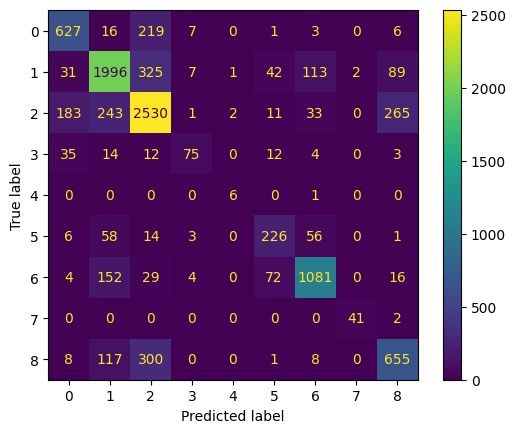

In [21]:
rennpa_confusion_matrix(model_trained, val_ds)

### **Abre uma gleba**

In [22]:
import shapely.wkt

gleba_polygon = shapely.wkt.loads("POLYGON ((-46.27456209961272 -12.652430633938323, -46.273968427698804 -12.652692678012613, -46.272936569372064 -12.651037658288033, -46.271749225544966 -12.648955076555083, -46.27059015180788 -12.646900062031833, -46.27027918080549 -12.646320793205092, -46.27104247326605 -12.645686354411424, -46.27480239538724 -12.65236167492651, -46.27456209961272 -12.652430633938323))")

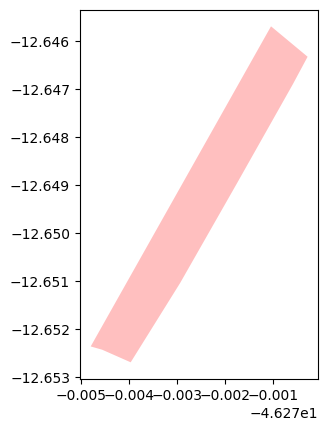

In [23]:
rennpa_plot_pts_region(gleba_polygon,[])

### **Aplica função para extração dos centroids de cada um dos pixels da gleba**

In [24]:
points = rennpa_get_pixels_from_polygon(gleba_polygon)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/rennpa/rennpa.py:375: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  x1, y1 = pyproj.transform(pyproj.CRS.from_epsg(4326), pyproj.CRS.from_wkt(BDC_PROJ), minx, miny, always_xy=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/rennpa/rennpa.py:376: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  x2, y2 = pyproj.transform(pyproj.CRS.from_epsg(4326), pyproj.CRS.from_wkt(BDC_PROJ), maxx, maxy, always_xy=True)


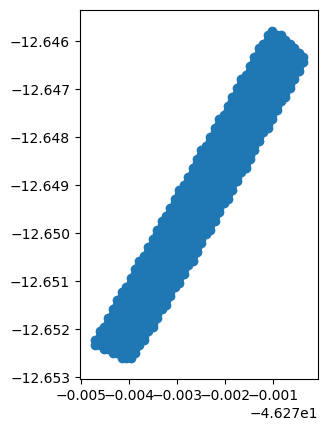

In [25]:
rennpa_plot_pts_region(gleba_polygon,points)

In [26]:
region = rennpa_get_pixels_from_bounds(gleba_polygon)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/rennpa/rennpa.py:397: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  x1, y1 = pyproj.transform(pyproj.CRS.from_epsg(4326), pyproj.CRS.from_wkt(BDC_PROJ), minx, miny, always_xy=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/rennpa/rennpa.py:398: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  x2, y2 = pyproj.transform(pyproj.CRS.from_epsg(4326), pyproj.CRS.from_wkt(BDC_PROJ), maxx, maxy, always_xy=True)


### **Executa classificação da gleba usando modelo**

In [27]:
xr_classification = rennpa_classify(cube, points, region, model)

100%|██████████| 3850/3850 [00:00<00:00, 62808.76it/s]
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [28]:
xr_classification

<xarray.Dataset> Size: 32kB
Dimensions:    (x: 50, y: 77, band: 1, time: 1)
Coordinates:
  * x          (x) float64 400B -46.27 -46.27 -46.27 ... -46.27 -46.27 -46.27
  * y          (y) float64 616B -12.65 -12.65 -12.65 ... -12.65 -12.65 -12.65
  * time       (time) <U4 16B '2023'
  * band       (band) int64 8B 1
Data variables:
    band_data  (band, time, x, y) int64 31kB 9 9 9 9 9 9 9 9 ... 9 9 9 9 9 9 9 9

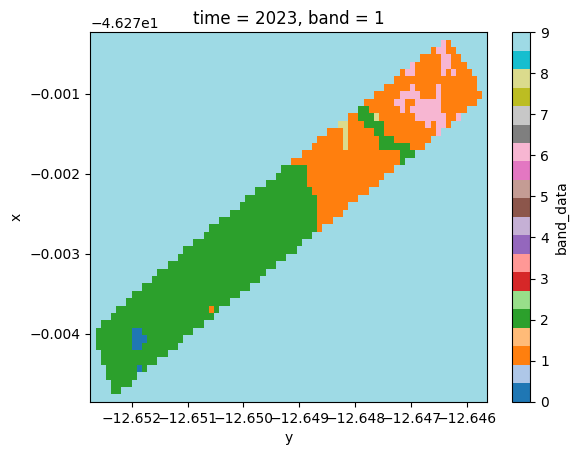

In [29]:
rennpa_plot_classification(xr_classification)